In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import regularizers


C:\Users\HOUSSENE\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dossier_image = r"E:\projet_data\datasets\animals\animals"

fichier_image = os.listdir(dossier_image)

batch =100
image_height = 240
image_width =240
data = keras.preprocessing.image_dataset_from_directory(
    dossier_image,
    labels="inferred",
    label_mode="int",
    image_size=(image_height,image_width),
    batch_size=batch

)
images = []
targets = []
list_annimaux = data.class_names
for image,target in data:
    images.extend(image.numpy())
    targets.extend(target.numpy())


images = np.array(images)
targets = np.array(targets)


Found 5400 files belonging to 90 classes.


In [9]:
print(images.shape,targets.shape)
print(list_annimaux[targets[1802]])


(5400, 172800) (5400,)
turkey


array([[186.      , 172.      , 133.      , ...,  35.13153 ,  26.212769,
         19.294006],
       [114.11042 ,  95.11042 ,  80.11042 , ..., 120.88959 , 143.88959 ,
          1.      ],
       [231.5     , 231.5     , 239.5     , ..., 187.66641 , 177.66641 ,
        168.66641 ],
       ...,
       [200.      , 208.      , 211.      , ...,  59.      ,  84.      ,
         54.      ],
       [254.      , 254.      , 254.      , ..., 254.      , 254.      ,
        254.      ],
       [238.92084 , 251.92084 , 255.      , ...,  90.07916 ,  78.07916 ,
         78.07916 ]], dtype=float32)

3997
5209
1802
3369
700
1524
1686
5165
186
1430
1314
3928


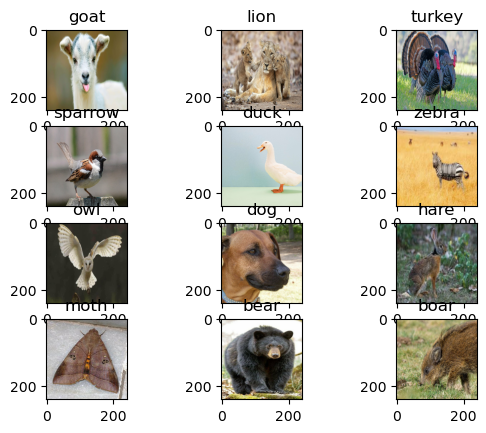

In [4]:
fig = plt.figure()
for i in range(1,4*3+1):
    index = np.random.randint(len(images))
    print(index)
    img = images[index].astype("uint8")
    fig.add_subplot(4,3,i)
    plt.title(list_annimaux[targets[index]])
    plt.imshow(img)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from keras.utils import to_categorical

In [10]:
images = images.reshape(images.shape[0],-1)
print(images.shape,targets.shape)
targets_encoded = to_categorical(targets, num_classes=20)
images = images[:1200]
image_train,image_test,target_train,target_test = train_test_split(images,targets_encoded,test_size=0.3,random_state=42)

print(image_train.shape,target_train.shape)
print(image_test.shape,target_test.shape)
print("mean et std",image_train.mean(),image_train.std())
scaler = StandardScaler()
scaler_train = scaler.fit_transform(image_train)
scaler_test = scaler.fit_transform(image_test)


print("mean et std",scaler_train.mean(),scaler_test.std())

(5400, 172800) (5400,)


IndexError: index 89 is out of bounds for axis 1 with size 20

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32,(3,3),activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64,(3,3),activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64,(3,3),activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),

    keras.layers.Dense(512,activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    keras.layers.Dense(256,activation="relu", kernel_regularizer=regularizers.l2(0.01)),
   Dropout(0.3),
    keras.layers.Dense(90,activation = "softmax")
])


In [ ]:
sgd = tensorflow.keras.optimizers.SGD(lr=0.0005)
model.compile(
    loss="categorical_crossentropy",
    optimizer= sgd,
    metrics=["accuracy"]
)

In [ ]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
scaler_train = scaler_train.reshape(-1, 240, 240, 3)
scaler_test = scaler_test.reshape(-1, 240, 240, 3)
history = model.fit(scaler_train,target_train,validation_data=(scaler_test,target_test),epochs=40,callbacks=[early_stopping])

In [ ]:
from sklearn.model_selection import GridSearchCV

# Définir les hyperparamètres à optimiser
param_grid = {
    'batch_size': [32, 64, 128],
    'epochs': [10, 20, 30],
    'optimizer': ['adam', 'sgd']
}

# Créer une grille de recherche avec votre modèle
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

# Effectuer la recherche sur la grille
grid_result = grid_search.fit(image_train, target_train)

# Afficher les meilleurs paramètres trouvés
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [2]:
dossier_image = r"I:\IA\datasets\animals\animals"
fichier_image = os.listdir(dossier_image)
targets = []
images = []
for class_image in fichier_image:
    targets.append(class_image)
for name in fichier_image[:2000]:
    draws = os.path.join(dossier_image,name)
    image = cv.imread(draws)
    image_D = cv.resize(image,(100,100))
    images.append(image_D)

NameError: name 'os' is not defined